## Gamma ray constraints

### ASTROGAM constraints

In [2]:
import numpy as np
from hazma.scalar_mediator import ScalarMediator
from hazma.gamma_ray_parameters import gc_target, gc_bg_model, A_eff_e_astrogam, energy_res_e_astrogam, T_obs_e_astrogam

sm = ScalarMediator(mx=1., ms=1000., gsxx=1., gsff=1., gsGG=1., gsFF=1.)
mxs = np.linspace(70., 250., 10)

sm_lims_e_astrogam = sm.unbinned_limits(mxs, target_params=gc_target, bg_model=gc_bg_model,
                                        A_eff=A_eff_e_astrogam, energy_res=energy_res_e_astrogam, T_obs=T_obs_e_astrogam)

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/theory/_theory_gamma_ray_limits.py:240: RuntimeWarning: invalid value encountered in sqrt
  df_de_a = 1./np.sqrt(I_B_val) * \
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/theory/_theory_gamma_ray_limits.py:242: RuntimeWarning: invalid value encountered in sqrt
  df_de_b = -1./np.sqrt(I_B_val) * \
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/theory/_theory_gamma_ray_limits.py:246: RuntimeWarning: invalid value encountered in sqrt
  return -I_S_val/np.sqrt(I_B_val), jac_val
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


### Constraints from existing data

In [3]:
import numpy as np
from hazma.scalar_mediator import ScalarMediator
from hazma.gamma_ray_parameters import egret_diffuse, comptel_diffuse, fermi_diffuse

sm = ScalarMediator(mx=1., ms=1000., gsxx=1., gsff=1., gsGG=1., gsFF=1.)
mxs = np.linspace(70., 250., 10)

sm_lims_comptel = sm.binned_limits(mxs, comptel_diffuse)
sm_lims_egret = sm.binned_limits(mxs, egret_diffuse)
sm_lims_fermi = sm.binned_limits(mxs, fermi_diffuse)

### Plot together

(1e-30, 1e-23)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


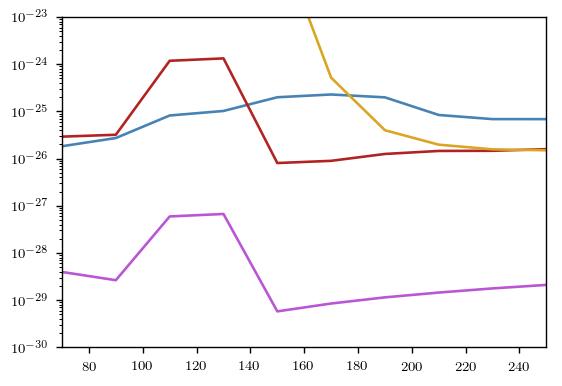

In [4]:
plt.plot(mxs, sm_lims_comptel)
plt.plot(mxs, sm_lims_egret)
plt.plot(mxs, sm_lims_fermi)
plt.plot(mxs, sm_lims_e_astrogam)

plt.yscale("log")
plt.xlim(mxs[[0, -1]])
plt.ylim(1e-30, 1e-23)

## $f_{\rm eff}$

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator
from hazma.pseudo_scalar_mediator import PseudoScalarMFV
from hazma.vector_mediator import VectorMediator

from hazma.parameters import neutral_pion_mass as mpi0
from hazma.cmb import f_eff_ep, f_eff_g

In [10]:
mx_min, mx_max, n_mxs = mpi0/2., 250., 10
mxs = np.linspace(mx_min, mx_max, n_mxs)

In [8]:
s_theta = 0.5
sm_hp = ScalarMediator(mx=1., ms=1000., gsxx=1.0, gsff=s_theta, gsGG=s_theta,
                       gsFF=-s_theta)
sm_f_effs = sm_hp.f_effs(mxs)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [12]:
psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1., gpuu=1., gpdd=-1., gpll=0.,
                      gpGG=1., gpFF=7./9.)
psm_f_effs = psm.f_effs(mxs)

In [13]:
vm = VectorMediator(mx=1., mv=1000., gvxx=1., gvuu=1., gvdd=0.2, gvss=0.,
                    gvee=0., gvmumu=0.)
vm_f_effs = vm.f_effs(mxs)  # plot for benchmark couplings

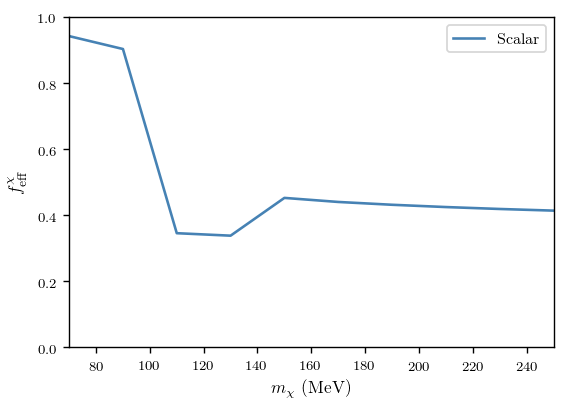

In [9]:
plt.figure(figsize=(5, 3.5))

plt.plot(mxs, sm_f_effs, label="Scalar")
# plt.plot(mxs, vm_f_effs, label="Vector")
# plt.plot(mxs, psm_f_effs, label="Pseudoscalar")

plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.)
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"$f_{\mathrm{eff}}^\chi$")
plt.legend()

## Other constraints (for scalar only)

In [5]:
from hazma.scalar_mediator import ScalarMediator

import numpy as np

def get_tex_label(cn):
    if cn in ["CHARM"]:
        return cn
    else:
        tex_label = r"$"+ cn
        tex_label = tex_label.replace("B", "B^+")
        tex_label = tex_label.replace("pi ", "\pi^+ ")
        tex_label = tex_label.replace("pi0", "\pi^0")
        tex_label = tex_label.replace("kl", "K_L")
        tex_label = tex_label.replace("k", "K^+")
        tex_label = tex_label.replace("mu mu", "\mu^+ \mu^-")
        tex_label = tex_label.replace("e e", "e^+ e^-")
        tex_label = tex_label.replace("invis", "~\mathrm{invis.}")
        tex_label = tex_label.replace("->", "\\to")

        return tex_label + r"$"

def get_colors(cn):
    cns = ['B -> k mu mu', 'kl -> pi0 mu mu', 'B -> k e e', 'kl -> pi0 e e', 'k -> pi invis', 'B -> k invis', "CHARM"]
    
    return list(plt.rcParams["axes.prop_cycle"])[cns.index(cn)]["color"]

In [6]:
mss = np.logspace(1, 3, 100)
gsffs = np.logspace(np.log10(5.5e-6), 0, 100)

sm_args = {"mx": 10000., "ms": 220., "gsxx": 1., "gsff": 1., "gsGG": 1., "gsFF": 0.}
sm = ScalarMediator(**sm_args)

# Compute constraints
constr_imgs = sm.constrain("ms", mss, "gsff", gsffs)

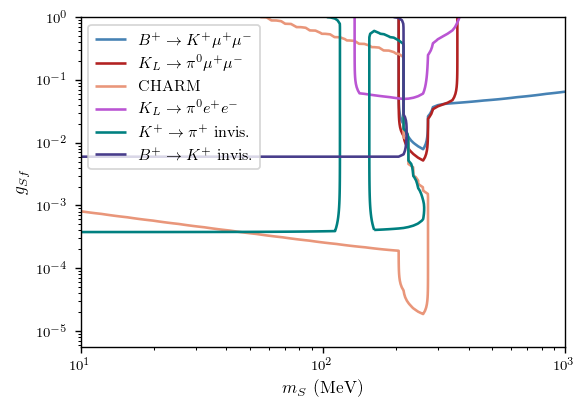

In [7]:
mss_mg, gsffs_mg = np.meshgrid(mss, gsffs)

for cn, img in constr_imgs.iteritems():
    cont = plt.contour(mss_mg, gsffs_mg, img, levels=[0], colors=get_colors(cn))
    cont.collections[0].set_label(get_tex_label(cn))

plt.xlabel(r"$m_S$ (MeV)")
plt.ylabel(r"$g_{Sf}$")
plt.legend(loc="upper left")
plt.xscale("log")
plt.yscale("log")